# F1 API Exploratory Data Analysis

In [1]:
import fastf1
import pandas as pd
import numpy as np

In [2]:
fastf1.Cache.enable_cache("../f1_cache")

In [3]:
calendar = fastf1.get_event_schedule(2025)
calendar

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2025,2025-02-28,Pre-Season Testing,testing,Practice 1,2025-02-26 10:00:00+03:00,2025-02-26 07:00:00,...,Practice 3,2025-02-28 10:00:00+03:00,2025-02-28 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Australia,Melbourne,FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ...,2025-03-16,Australian Grand Prix,conventional,Practice 1,2025-03-14 12:30:00+11:00,2025-03-14 01:30:00,...,Practice 3,2025-03-15 12:30:00+11:00,2025-03-15 01:30:00,Qualifying,2025-03-15 16:00:00+11:00,2025-03-15 05:00:00,Race,2025-03-16 15:00:00+11:00,2025-03-16 04:00:00,True
2,2,China,Shanghai,FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025,2025-03-23,Chinese Grand Prix,sprint_qualifying,Practice 1,2025-03-21 11:30:00+08:00,2025-03-21 03:30:00,...,Sprint,2025-03-22 11:00:00+08:00,2025-03-22 03:00:00,Qualifying,2025-03-22 15:00:00+08:00,2025-03-22 07:00:00,Race,2025-03-23 15:00:00+08:00,2025-03-23 07:00:00,True
3,3,Japan,Suzuka,FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025,2025-04-06,Japanese Grand Prix,conventional,Practice 1,2025-04-04 11:30:00+09:00,2025-04-04 02:30:00,...,Practice 3,2025-04-05 11:30:00+09:00,2025-04-05 02:30:00,Qualifying,2025-04-05 15:00:00+09:00,2025-04-05 06:00:00,Race,2025-04-06 14:00:00+09:00,2025-04-06 05:00:00,True
4,4,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025,2025-04-13,Bahrain Grand Prix,conventional,Practice 1,2025-04-11 14:30:00+03:00,2025-04-11 11:30:00,...,Practice 3,2025-04-12 15:30:00+03:00,2025-04-12 12:30:00,Qualifying,2025-04-12 19:00:00+03:00,2025-04-12 16:00:00,Race,2025-04-13 18:00:00+03:00,2025-04-13 15:00:00,True
5,5,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2025,2025-04-20,Saudi Arabian Grand Prix,conventional,Practice 1,2025-04-18 16:30:00+03:00,2025-04-18 13:30:00,...,Practice 3,2025-04-19 16:30:00+03:00,2025-04-19 13:30:00,Qualifying,2025-04-19 20:00:00+03:00,2025-04-19 17:00:00,Race,2025-04-20 20:00:00+03:00,2025-04-20 17:00:00,True
6,6,United States,Miami Gardens,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2025,2025-05-04,Miami Grand Prix,sprint_qualifying,Practice 1,2025-05-02 12:30:00-04:00,2025-05-02 16:30:00,...,Sprint,2025-05-03 12:00:00-04:00,2025-05-03 16:00:00,Qualifying,2025-05-03 16:00:00-04:00,2025-05-03 20:00:00,Race,2025-05-04 16:00:00-04:00,2025-05-04 20:00:00,True
7,7,Italy,Imola,FORMULA 1 AWS GRAN PREMIO DEL MADE IN ITALY E ...,2025-05-18,Emilia Romagna Grand Prix,conventional,Practice 1,2025-05-16 13:30:00+02:00,2025-05-16 11:30:00,...,Practice 3,2025-05-17 12:30:00+02:00,2025-05-17 10:30:00,Qualifying,2025-05-17 16:00:00+02:00,2025-05-17 14:00:00,Race,2025-05-18 15:00:00+02:00,2025-05-18 13:00:00,True
8,8,Monaco,Monaco,FORMULA 1 TAG HEUER GRAND PRIX DE MONACO 2025,2025-05-25,Monaco Grand Prix,conventional,Practice 1,2025-05-23 13:30:00+02:00,2025-05-23 11:30:00,...,Practice 3,2025-05-24 12:30:00+02:00,2025-05-24 10:30:00,Qualifying,2025-05-24 16:00:00+02:00,2025-05-24 14:00:00,Race,2025-05-25 15:00:00+02:00,2025-05-25 13:00:00,True
9,9,Spain,Barcelona,FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2025,2025-06-01,Spanish Grand Prix,conventional,Practice 1,2025-05-30 13:30:00+02:00,2025-05-30 11:30:00,...,Practice 3,2025-05-31 12:30:00+02:00,2025-05-31 10:30:00,Qualifying,2025-05-31 16:00:00+02:00,2025-05-31 14:00:00,Race,2025-06-01 15:00:00+02:00,2025-06-01 13:00:00,True


In [4]:
event = fastf1.get_event(2025, "Melbourne")
event

RoundNumber                                                          1
Country                                                      Australia
Location                                                     Melbourne
OfficialEventName    FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ...
EventDate                                          2025-03-16 00:00:00
EventName                                        Australian Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2025-03-14 12:30:00+11:00
Session1DateUtc                                    2025-03-14 01:30:00
Session2                                                    Practice 2
Session2Date                                 2025-03-14 16:00:00+11:00
Session2DateUtc                                    2025-03-14 05:00:00
Session3                                                    Practice 3
Sessio

In [5]:
session_2024 = fastf1.get_session(2024, 8, "R")
session_2024.load()
laps_2024 = session_2024.laps[["Driver", "LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]].copy()
laps_2024.dropna(inplace=True)

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


In [6]:
session_2024.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:07.152000,Finished,18.0,78.0
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:07.585000,Finished,15.0,78.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:08.650000,Finished,12.0,78.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,5.0,5,5.0,NaT,NaT,NaT,0 days 00:00:13.309000,Finished,10.0,78.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:13.853000,Finished,8.0,78.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,7.0,7,7.0,NaT,NaT,NaT,0 days 00:00:14.908000,Finished,7.0,78.0
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,8.0,8,8.0,NaT,NaT,NaT,0 days 00:00:39.487000,Lapped,4.0,77.0
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,9.0,9,9.0,NaT,NaT,NaT,0 days 00:00:54.052000,Lapped,2.0,77.0
10,10,P GASLY,GAS,gasly,Alpine,0093cc,alpine,Pierre,Gasly,Pierre Gasly,...,10.0,10,10.0,NaT,NaT,NaT,0 days 00:01:00.241000,Lapped,1.0,77.0


core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

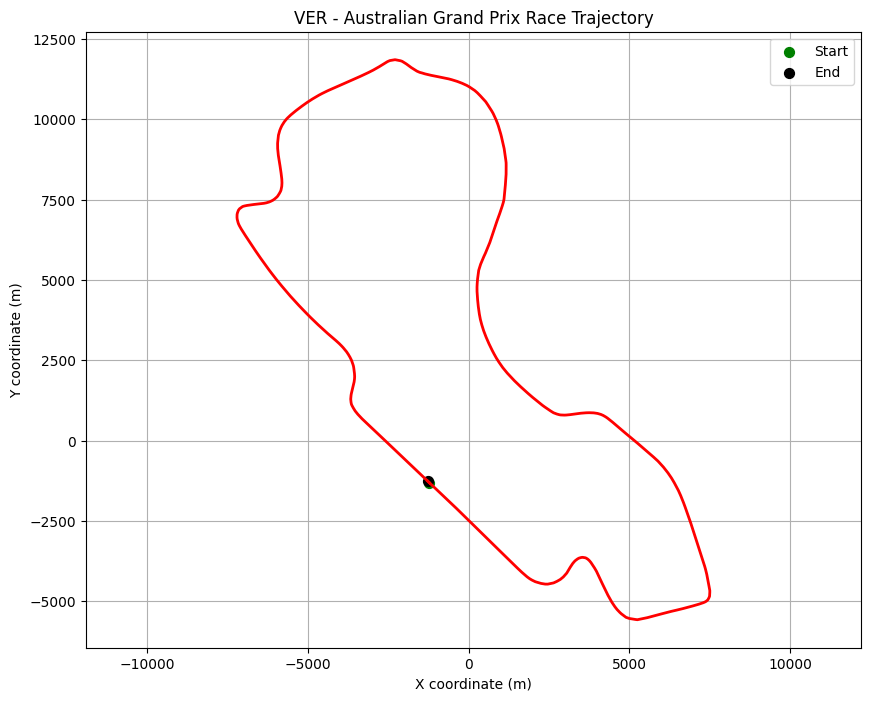

In [23]:
from fastf1 import plotting
from matplotlib import pyplot as plt

session = fastf1.get_session(2024, 'Melbourne', 'R')
session.load()

# Choose a driver (example: Max Verstappen)
driver_code = 'VER'
laps = session.laps.pick_driver(driver_code)

fastest_lap = laps.pick_fastest()

tel = fastest_lap.get_telemetry()

plotting.setup_mpl(misc_mpl_mods=False)
plt.figure(figsize=(10, 8))
plt.title(f"{driver_code} - {session.event['EventName']} {session.name} Trajectory")

plt.plot(tel['X'], tel['Y'], color='red', linewidth=2)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')
plt.axis('equal')
plt.grid(True)

plt.scatter(tel['X'].iloc[0], tel['Y'].iloc[0], color='green', label='Start', s=50)
plt.scatter(tel['X'].iloc[-1], tel['Y'].iloc[-1], color='black', label='End', s=50)
plt.legend()

plt.show()

In [24]:
print(tel)

                       Date            SessionTime DriverAhead  \
2   2024-03-24 04:06:04.241 0 days 01:01:21.043000               
3   2024-03-24 04:06:04.360 0 days 01:01:21.162000               
4   2024-03-24 04:06:04.410 0 days 01:01:21.212000               
5   2024-03-24 04:06:04.600 0 days 01:01:21.402000               
6   2024-03-24 04:06:04.690 0 days 01:01:21.492000          55   
..                      ...                    ...         ...   
649 2024-03-24 04:07:26.901 0 days 01:02:43.703000          55   
650 2024-03-24 04:07:27.090 0 days 01:02:43.892000          55   
651 2024-03-24 04:07:27.221 0 days 01:02:44.023000          55   
652 2024-03-24 04:07:27.290 0 days 01:02:44.092000          55   
653 2024-03-24 04:07:27.356 0 days 01:02:44.158000          55   

     DistanceToDriverAhead                   Time           RPM       Speed  \
2                45.022500        0 days 00:00:00  10727.667866  301.396429   
3                45.022500 0 days 00:00:00.119000

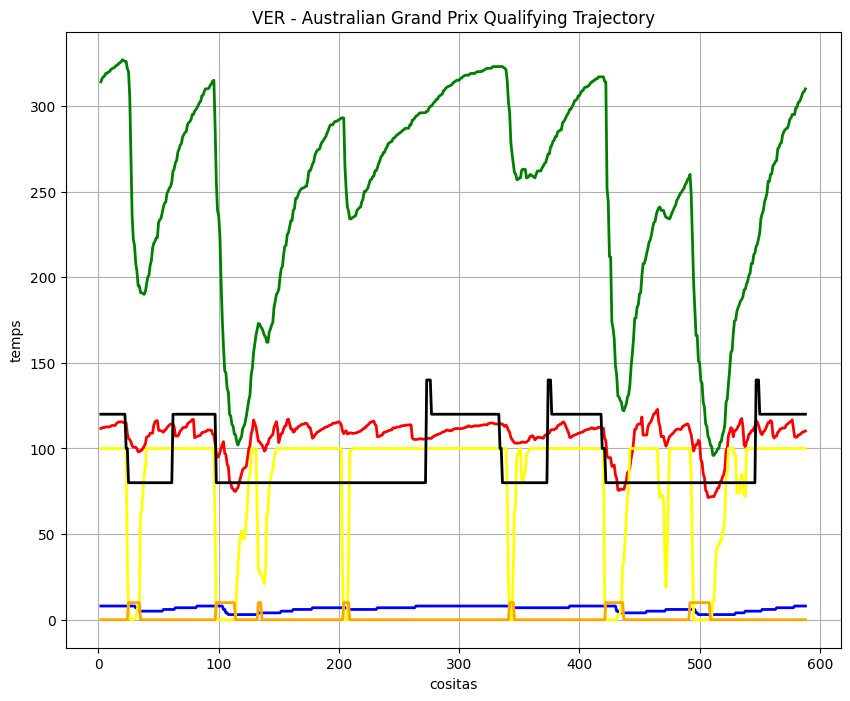

In [ ]:
plt.figure(figsize=(10, 8))
plt.title(f"{driver_code} - {session.event['EventName']} {session.name} Trajectory")

plt.plot(tel['RPM']/100, color='red', linewidth=2)
plt.plot(tel['Speed'], color='green', linewidth=2)
plt.plot(tel['nGear'], color='blue', linewidth=2)
plt.plot(tel['Throttle'], color='yellow', linewidth=2)
plt.plot(tel['Brake']*10, color='orange', linewidth=2)
plt.plot(tel['DRS']*10, color='black', linewidth=2)
plt.xlabel('cositas')
plt.ylabel('temps')
plt.grid(True)